In [1]:
#!pip install pymongo[srv]

In [2]:
import pymongo
from pymongo import MongoClient
from pprint import pprint

In [3]:
client=MongoClient('localhost',27017)

In [4]:
client.list_database_names()

['admin', 'config', 'local', 'mylib', 'project', 'purni_lab']

In [5]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
  
# Database Name
db = client["project"]
  
# Collection Name
col = db["spam_ham"]
  
spam_data= col.find()
_id=[]
Label=[]
SMS=[]
for data in spam_data:
    _id.append(data["_id"])
    Label.append(data["Label"])
    SMS.append(data["SMS"])

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
spam_data=pd.DataFrame({"_id":_id,"Label":Label,"SMS":SMS})
spam_data.head(10)

,_id,Label,SMS
0,608a97ab60671b46401ceeb6,ham,"Go until jurong point, crazy.. Available only ..."
1,608a97ab60671b46401ceeb7,ham,Ok lar... Joking wif u oni...
2,608a97ab60671b46401ceeb8,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,608a97ab60671b46401ceeb9,ham,U dun say so early hor... U c already then say...
4,608a97ab60671b46401ceeba,ham,"Nah I don't think he goes to usf, he lives aro..."
5,608a97ab60671b46401ceebb,spam,FreeMsg Hey there darling it's been 3 week's n...
6,608a97ab60671b46401ceebc,ham,Even my brother is not like to speak with me. ...
7,608a97ab60671b46401ceebd,ham,As per your request 'Melle Melle (Oru Minnamin...
8,608a97ab60671b46401ceebe,spam,WINNER!! As a valued network customer you have...
9,608a97ab60671b46401ceebf,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
spam_data.dtypes

_id      object
Label    object
SMS      object
dtype: object

In [9]:
del spam_data["_id"]

In [10]:
print(spam_data)

     Label                                                SMS
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

In [11]:
spam_data.shape

(5574, 2)

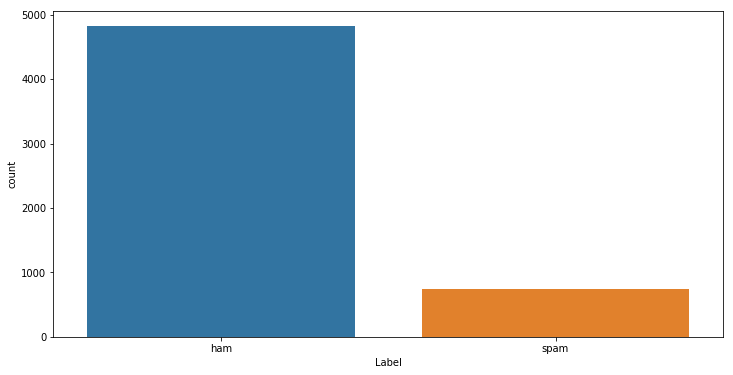

In [12]:
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = spam_data, x = 'Label');

In [13]:
#Use to remove spaces or Strip whitespaces (including newlines) 
spam_data.columns=spam_data.columns.str.lstrip()

In [14]:
#To get values
spam_data.values

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['ham', 'Ok lar... Joking wif u oni...'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?'],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['ham', 'Rofl. Its true to its name']], dtype=object)

In [15]:
#To get information about file
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
Label    5574 non-null object
SMS      5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
# Number of words in each SMS:
spam_data['word_count'] = spam_data['SMS'].apply(lambda x: len(str(x).split(" ")))
spam_data[['SMS','word_count']].head(10)

,SMS,word_count
0,"Go until jurong point, crazy.. Available only ...",20
1,Ok lar... Joking wif u oni...,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,U dun say so early hor... U c already then say...,11
4,"Nah I don't think he goes to usf, he lives aro...",13
5,FreeMsg Hey there darling it's been 3 week's n...,32
6,Even my brother is not like to speak with me. ...,16
7,As per your request 'Melle Melle (Oru Minnamin...,26
8,WINNER!! As a valued network customer you have...,26
9,Had your mobile 11 months or more? U R entitle...,29


In [17]:
# Number of Characters in each SMS:
spam_data['char_count'] = spam_data['SMS'].str.len() #including spaces
spam_data[['SMS','char_count']].head(10)

,SMS,char_count
0,"Go until jurong point, crazy.. Available only ...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives aro...",61
5,FreeMsg Hey there darling it's been 3 week's n...,147
6,Even my brother is not like to speak with me. ...,77
7,As per your request 'Melle Melle (Oru Minnamin...,160
8,WINNER!! As a valued network customer you have...,157
9,Had your mobile 11 months or more? U R entitle...,154


In [18]:
# Calculating average word length in each SMS:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

spam_data['avg_word'] = spam_data['SMS'].apply(lambda x: avg_word(x))
spam_data[['SMS','avg_word']].head()

,SMS,avg_word
0,"Go until jurong point, crazy.. Available only ...",4.600000
1,Ok lar... Joking wif u oni...,4.000000
2,Free entry in 2 a wkly comp to win FA Cup fina...,4.571429
3,U dun say so early hor... U c already then say...,3.545455
4,"Nah I don't think he goes to usf, he lives aro...",3.769231


In [19]:
import nltk

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PURNI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Number of stopwords:
from nltk.corpus import stopwords
stop = stopwords.words('english')
spam_data['stopwords'] = spam_data['SMS'].apply(lambda x: [x for x in x.split() if x in stop])
spam_data['stopwords_count'] = spam_data['SMS'].apply(lambda x: len([x for x in x.split() if x in stop]))
spam_data[['SMS','stopwords','stopwords_count']].head(10)

,SMS,stopwords,stopwords_count
0,"Go until jurong point, crazy.. Available only ...","[until, only, in, there]",4
1,Ok lar... Joking wif u oni...,[],0
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[in, a, to, to, to]",5
3,U dun say so early hor... U c already then say...,"[so, then]",2
4,"Nah I don't think he goes to usf, he lives aro...","[don't, he, to, he, here]",5
5,FreeMsg Hey there darling it's been 3 week's n...,"[there, it's, been, now, and, no, some, you, u...",13
6,Even my brother is not like to speak with me. ...,"[my, is, not, to, with, me]",6
7,As per your request 'Melle Melle (Oru Minnamin...,"[your, has, been, as, your, for, all, to, your]",9
8,WINNER!! As a valued network customer you have...,"[a, you, have, been, to]",5
9,Had your mobile 11 months or more? U R entitle...,"[your, or, to, to, the, with, for, on]",8


In [22]:
# Number of special characters:
spam_data['hastags'] =spam_data['SMS'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
spam_data['address'] =spam_data['SMS'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
spam_data[['SMS','hastags','address']].head(10)

,SMS,hastags,address
0,"Go until jurong point, crazy.. Available only ...",0,0
1,Ok lar... Joking wif u oni...,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,0
3,U dun say so early hor... U c already then say...,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,0
5,FreeMsg Hey there darling it's been 3 week's n...,0,0
6,Even my brother is not like to speak with me. ...,0,0
7,As per your request 'Melle Melle (Oru Minnamin...,0,0
8,WINNER!! As a valued network customer you have...,0,0
9,Had your mobile 11 months or more? U R entitle...,0,0


In [23]:
spam_data['SMS'].head(10)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: SMS, dtype: object

In [24]:
# Importing required Libraries
from sklearn.model_selection import train_test_split
from collections import Counter
import string
import re
import mailbox
from textblob import TextBlob
import sklearn

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random
stop_words = set(stopwords.words('english'))

In [26]:
spam_data.head()

,Label,SMS,word_count,char_count,avg_word,stopwords,stopwords_count,hastags,address
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,4.600000,"[until, only, in, there]",4,0,0
1,ham,Ok lar... Joking wif u oni...,6,29,4.000000,[],0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,4.571429,"[in, a, to, to, to]",5,0,0
3,ham,U dun say so early hor... U c already then say...,11,49,3.545455,"[so, then]",2,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,3.769231,"[don't, he, to, he, here]",5,0,0


## Data Preprocessing

In [27]:
def preprocess_spam_sms(sms):
    sms.lower()
    # Remove urls
    sms = re.sub(r"http\S+|www\S+|https\S+", '', sms, flags=re.MULTILINE)
    
    # Removing Punctuation:
    sms = re.sub(r'[^\w\s]','', sms)
    sms = sms.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    sms_tokens = word_tokenize(sms)
    filtered_words = [w for w in sms_tokens if not w in stop_words]
    
    return " ".join(filtered_words)

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PURNI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
pd.options.mode.chained_assignment = None
spam_data['SMS'] = spam_data['SMS'].apply(preprocess_spam_sms)

In [30]:
spam_data.head(10)

,Label,SMS,word_count,char_count,avg_word,stopwords,stopwords_count,hastags,address
0,ham,Go jurong point crazy Available bugis n great ...,20,111,4.600000,"[until, only, in, there]",4,0,0
1,ham,Ok lar Joking wif u oni,6,29,4.000000,[],0,0,0
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,28,155,4.571429,"[in, a, to, to, to]",5,0,0
3,ham,U dun say early hor U c already say,11,49,3.545455,"[so, then]",2,0,0
4,ham,Nah I dont think goes usf lives around though,13,61,3.769231,"[don't, he, to, he, here]",5,0,0
5,spam,FreeMsg Hey darling 3 weeks word back Id like ...,32,147,3.625000,"[there, it's, been, now, and, no, some, you, u...",13,0,0
6,ham,Even brother like speak They treat like aids p...,16,77,3.875000,"[my, is, not, to, with, me]",6,0,0
7,ham,As per request Melle Melle Oru Minnaminunginte...,26,160,5.192308,"[your, has, been, as, your, for, all, to, your]",9,0,0
8,spam,WINNER As valued network customer selected rec...,26,157,5.076923,"[a, you, have, been, to]",5,0,0
9,spam,Had mobile 11 months U R entitled Update lates...,29,154,4.344828,"[your, or, to, to, the, with, for, on]",8,0,0


In [31]:
# Make sentences in lower case
pd.options.mode.chained_assignment = None
spam_data['SMS']=spam_data['SMS'].str.lower()

In [32]:
spam_data.head(10)

,Label,SMS,word_count,char_count,avg_word,stopwords,stopwords_count,hastags,address
0,ham,go jurong point crazy available bugis n great ...,20,111,4.600000,"[until, only, in, there]",4,0,0
1,ham,ok lar joking wif u oni,6,29,4.000000,[],0,0,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28,155,4.571429,"[in, a, to, to, to]",5,0,0
3,ham,u dun say early hor u c already say,11,49,3.545455,"[so, then]",2,0,0
4,ham,nah i dont think goes usf lives around though,13,61,3.769231,"[don't, he, to, he, here]",5,0,0
5,spam,freemsg hey darling 3 weeks word back id like ...,32,147,3.625000,"[there, it's, been, now, and, no, some, you, u...",13,0,0
6,ham,even brother like speak they treat like aids p...,16,77,3.875000,"[my, is, not, to, with, me]",6,0,0
7,ham,as per request melle melle oru minnaminunginte...,26,160,5.192308,"[your, has, been, as, your, for, all, to, your]",9,0,0
8,spam,winner as valued network customer selected rec...,26,157,5.076923,"[a, you, have, been, to]",5,0,0
9,spam,had mobile 11 months u r entitled update lates...,29,154,4.344828,"[your, or, to, to, the, with, for, on]",8,0,0


In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PURNI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Stemming :Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc.

Lemmatization:
Lemmatization is a more effective option than stemming because it converts the word into its root word,rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [34]:
from textblob import Word
spam_data.loc[:, ('SMS')] = spam_data.loc[:, ('SMS')].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
spam_data['SMS'].head(10)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4           nah i dont think go usf life around though
5    freemsg hey darling 3 week word back id like f...
6    even brother like speak they treat like aid pa...
7    a per request melle melle oru minnaminunginte ...
8    winner a valued network customer selected rece...
9    had mobile 11 month u r entitled update latest...
Name: SMS, dtype: object

In [35]:
#replacing numbers with " "
spam_data['SMS'] = spam_data['SMS'].str.replace(r'\d+','')

In [36]:
spam_data['SMS'].head(10)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry  wkly comp win fa cup final tkts st...
3                  u dun say early hor u c already say
4           nah i dont think go usf life around though
5    freemsg hey darling  week word back id like fu...
6    even brother like speak they treat like aid pa...
7    a per request melle melle oru minnaminunginte ...
8    winner a valued network customer selected rece...
9    had mobile  month u r entitled update latest c...
Name: SMS, dtype: object

In [37]:
spam_data.head(10)

,Label,SMS,word_count,char_count,avg_word,stopwords,stopwords_count,hastags,address
0,ham,go jurong point crazy available bugis n great ...,20,111,4.600000,"[until, only, in, there]",4,0,0
1,ham,ok lar joking wif u oni,6,29,4.000000,[],0,0,0
2,spam,free entry wkly comp win fa cup final tkts st...,28,155,4.571429,"[in, a, to, to, to]",5,0,0
3,ham,u dun say early hor u c already say,11,49,3.545455,"[so, then]",2,0,0
4,ham,nah i dont think go usf life around though,13,61,3.769231,"[don't, he, to, he, here]",5,0,0
5,spam,freemsg hey darling week word back id like fu...,32,147,3.625000,"[there, it's, been, now, and, no, some, you, u...",13,0,0
6,ham,even brother like speak they treat like aid pa...,16,77,3.875000,"[my, is, not, to, with, me]",6,0,0
7,ham,a per request melle melle oru minnaminunginte ...,26,160,5.192308,"[your, has, been, as, your, for, all, to, your]",9,0,0
8,spam,winner a valued network customer selected rece...,26,157,5.076923,"[a, you, have, been, to]",5,0,0
9,spam,had mobile month u r entitled update latest c...,29,154,4.344828,"[your, or, to, to, the, with, for, on]",8,0,0


## Spliting the dataset into 70-30

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(spam_data['SMS'], spam_data['Label'], test_size=0.3, random_state=1)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['SMS'] = X_train
df_train['Label'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['SMS'] = X_test
df_test['Label'] = y_test
df_test = df_test.reset_index(drop=True)

In [39]:
X_train.shape

(3901,)

In [40]:
X_test.shape

(1673,)

In [41]:
y_train.shape

(3901,)

In [42]:
y_test.shape

(1673,)

In [43]:
df_train.groupby(['Label']).count()

,SMS
Label,
ham,3376
spam,525


In [44]:
df_test.groupby(['Label']).count()

,SMS
Label,
ham,1451
spam,222


In [45]:
df_train.shape

(3901, 2)

In [46]:
#import metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
#function which takes in y test value and y predicted value and prints the associated model performance metrics
def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class,pos_label='spam'))
    print('recall')
    print(recall_score(y_test,predicted_class,pos_label='spam'))
    print('f-Score')
    print(f1_score(y_test,predicted_class,pos_label='spam'))
    print('AUC')
    print(roc_auc_score(np.where(y_test=='spam',1,0),np.where(predicted_class=='spam',1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

# Naive Bayes

In [48]:
n_sms = 3901
#Divide into number of classes
df_spam = spam_data.copy()[spam_data.Label == 'spam'][:n_sms]
df_ham = spam_data.copy()[spam_data.Label == 'ham'][:n_sms]
df = pd.concat([df_spam, df_ham], ignore_index=True).reset_index(drop=True)

In [49]:
class MailNBClassifier(object):

    def __init__(self, df_train):
        #contain all spam and ham in our training set respectively
        self.df_train = df_train
        self.df_spam = df_train.copy()[df_train.Label == 'spam']
        self.df_ham = df_train.copy()[df_train.Label == 'ham']

    def fit(self):
        #compute the “prior” probabilities necessary for classification
        #the number of sms in each class/ total number of sms in the training set
        Pr_spam = df_spam.shape[0]/self.df_train.shape[0]
        Pr_ham = df_ham.shape[0]/self.df_train.shape[0]
        self.Prior  = (Pr_spam, Pr_ham)
        #Creating vovabulary
        #we compute the number of words in each of the dataframes df_spam and df_ham
        self.spam_words = ' '.join(self.df_spam['SMS'].tolist()).split() 
        self.ham_words = ' '.join(self.df_ham['SMS'].tolist()).split()
        #collects every word in the training set
        all_words = ' '.join(self.df_train['SMS'].tolist()).split()
        #the number of unique words, so counter is used
        self.vocab = len(Counter(all_words))
        #count the total number of words in df_spam and df_ham respectively
        wc_spam = len(' '.join(self.df_spam['SMS'].tolist()).split())
        wc_ham = len(' '.join(self.df_ham['SMS'].tolist()).split())
        self.word_count = (wc_spam, wc_ham)
        return self

    def predict(self, df_test):
        class_choice = ['spam', 'ham']

        classification = []
        for mail in df_test['SMS']:
            SMS = mail.split() 
            #each tweet is first split into its individual word components from tweet

            val_spam = np.array([])
            val_ham = np.array([])
            for word in SMS:
                tmp_spam = np.log(self.spam_words.count(word)+1)
                tmp_ham = np.log(self.ham_words.count(word)+1)
                val_spam = np.append(val_spam, tmp_spam)
                val_ham = np.append(val_ham, tmp_ham)

            denom_spam = len(SMS)*np.log(self.word_count[0]+self.vocab)
            denom_ham = len(SMS)*np.log(self.word_count[1]+self.vocab)

            val_spam = np.log(self.Prior[0]) + np.sum(val_spam) - denom_spam
            val_ham = np.log(self.Prior[1]) + np.sum(val_ham) - denom_ham

            probability = (val_spam, val_ham)
            classification.append(class_choice[np.argmax(probability)])
        return classification
    
    def score(self, feature, target):
        comp_c, comp_i = (0,0)
        tp, tn, fp, fn = (0,0,0,0)
        for i in range(0,len(feature)):
            if feature[i] == target[i]:
                comp_c += 1
            else:
                comp_i += 1
        accuracy  = comp_c/(comp_c + comp_i)
        return accuracy  

In [50]:
tnb = MailNBClassifier(df_train)
tnb = tnb.fit()
predict = tnb.predict(df_test)
Accuracy_score = tnb.score(predict, df_test.Label.tolist())

In [51]:
Accuracy_score

0.9665271966527197

# Logistic Regression.


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [53]:
print(f"Train Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Train Data Shape: (3901,)
Test Data Shape: (1673,)


In [54]:
#Preprocess text to build the ML mdel
cVect = CountVectorizer()
cVect.fit(X_train)

CountVectorizer()

In [55]:
#Let's see the vocabulary that has extracted by the count vextorizer
print('NO.of Tokens: ',len(cVect.vocabulary_.keys()))

NO.of Tokens:  6470


In [56]:
# document term vector (dtv)
dtv = cVect.transform(X_train)
dtv = dtv.toarray()
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 3901
Tokens/Features: 6470


In [57]:
%%time
lr = LogisticRegression(verbose=1)
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)

Wall time: 677 ms


### Evaluate on the Test data

In [58]:
# Preprocess the test data
test_dtv = cVect.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens/Features: {test_dtv.shape[1]}")

Number of Observations: 1673
Tokens/Features: 6470


In [59]:
%%time
pred = lr.predict(test_dtv)

Wall time: 133 ms


confusion matrix
[[1450    1]
 [  31  191]]
accuracy
0.9808726838015541
precision
0.9947916666666666
recall
0.8603603603603603
f-Score
0.9227053140096617
AUC
0.9298355902422063


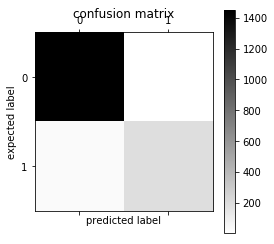

In [60]:
model_assessment(y_test,pred)

In [61]:
for i in spam_data.iterrows():
    print("Class Label: {}\nMail: {}\n\n".format(i[1][0], i[1][1]))
    if i[0] == 6: break

Class Label: ham
Mail: go jurong point crazy available bugis n great world la e buffet cine got amore wat


Class Label: ham
Mail: ok lar joking wif u oni


Class Label: spam
Mail: free entry  wkly comp win fa cup final tkts st may  text fa  receive entry questionstd txt ratetcs apply overs


Class Label: ham
Mail: u dun say early hor u c already say


Class Label: ham
Mail: nah i dont think go usf life around though


Class Label: spam
Mail: freemsg hey darling  week word back id like fun still tb ok xxx std chgs send  rcv


Class Label: ham
Mail: even brother like speak they treat like aid patent




### Predict Class label for the unseen data i.e., Spam or Ham

In [62]:
def predict_class(lr):
    text = input('Enter Text(Subject of the mail): ')
    text = [' '.join([ word for word in word_tokenize(text)  if not word in stop_words])]
    t_dtv = cVect.transform(text).toarray()
    prob = lr.predict_proba(t_dtv)*100
    print(f"Ham: {prob[0][0]}%\nSpam: {prob[0][1]}%")
    plt.figure(figsize=(12, 6))
    sns.barplot(x =['Ham', 'Spam'] , y = [prob[0][0], prob[0][1]])
    plt.xlabel('Class')
    plt.ylabel('Probalility')
    plt.show()

Enter Text(Subject of the mail): go jurong point crazy available bugis n great world la e buffet cine got amore wat
Ham: 99.58758334250071%
Spam: 0.41241665749929024%


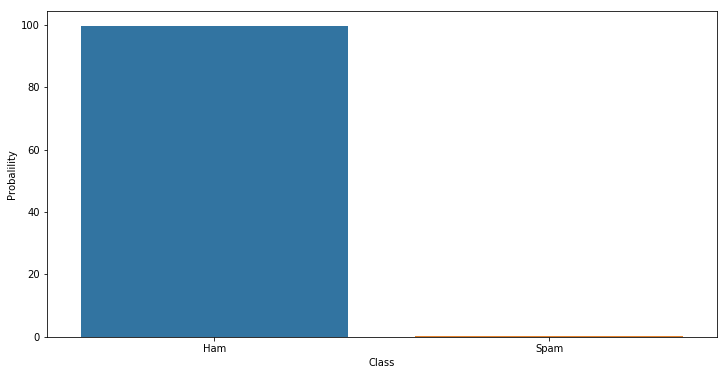

In [63]:
predict_class(lr)

# Comparison of Different ML Algorithm

In [64]:
#import cPickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [65]:
#shuffle dataframes for ham/spam mails as no of ham mail are much higher than spam mail
from sklearn.utils import shuffle
spam_data = shuffle(spam_data)
len(spam_data)

5574

In [66]:
#for each word in the email text, get the base form of the word and return the list of base words
def split_into_lemmas(SMS):
    message = SMS.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

In [67]:
#function to apply the count vectorizer(BOW) and TF-IDF transforms to a set of input features
def features_transform(mail):
    #get the bag of words for the mail text
    bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(X_train)
    #print(len(bow_transformer.vocabulary_))
    messages_bow = bow_transformer.transform(mail)
    #apply the TF-IDF transform to the output of BOW
    tfidf_transformer = TfidfTransformer().fit(messages_bow)
    messages_tfidf = tfidf_transformer.transform(messages_bow)
    #print(messages_tfidf.shape)
    #return result of transforms
    return messages_tfidf

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
#transform training set features into a set of useful features to build models
train_features=features_transform(X_train)

# Naive Bayes

In [70]:
#create and fit NB model
modelNB=MultinomialNB()

In [71]:
modelNB.fit(train_features,y_train)

MultinomialNB()

In [72]:
#transform test features to test the model performance
test_features=features_transform(X_test)

In [73]:
#NB predictions
predicted_class_NB=modelNB.predict(test_features)

confusion matrix
[[1451    0]
 [  60  162]]
accuracy
0.9641362821279139
precision
1.0
recall
0.7297297297297297
f-Score
0.8437499999999999
AUC
0.8648648648648649


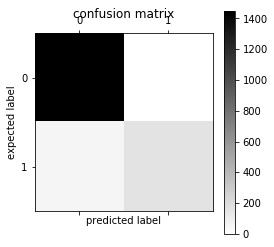

In [74]:
#assess NB
model_assessment(y_test,predicted_class_NB)

# Decision Tree

In [75]:
#create and fit tree model
model_tree=DecisionTreeClassifier()

In [76]:
model_tree.fit(train_features,y_train)

DecisionTreeClassifier()

In [77]:
#run model on test and print metrics
predicted_class_tree=model_tree.predict(test_features)

confusion matrix
[[1427   24]
 [  47  175]]
accuracy
0.9575612671846981
precision
0.8793969849246231
recall
0.7882882882882883
f-Score
0.8313539192399051
AUC
0.8858739856327728


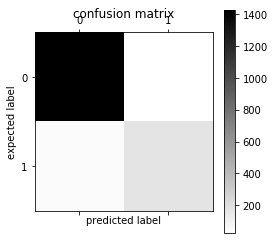

In [78]:
model_assessment(y_test,predicted_class_tree)

# Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
#create and fit model
model_rf=RandomForestClassifier(n_estimators=20,criterion='entropy')

In [81]:
model_rf.fit(train_features,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [82]:
#run model on test and print metrics
predicted_class_rf=model_rf.predict(test_features)

confusion matrix
[[1450    1]
 [  49  173]]
accuracy
0.9701135684399282
precision
0.9942528735632183
recall
0.7792792792792793
f-Score
0.8737373737373738
AUC
0.8892950497016658


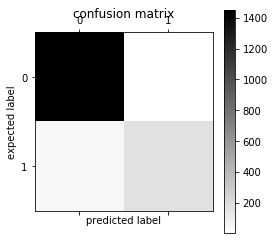

In [83]:
model_assessment(y_test,predicted_class_rf)